In [18]:
import pandas as pd

In [19]:
c10 = pd.read_csv('./data/2010census.csv')
c10.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


In [20]:
states = ['Alabama', 'Alaska', 'Arizona',
       'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware',
       'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming',]
print(len(states))

50


In [21]:
c10 = c10[c10['NAME'].isin(states)]
len(c10)

50

In [22]:
c10 = c10[['NAME', 'CENSUS2010POP']]
c10.rename(columns={'NAME': 'state', 'CENSUS2010POP': 'pop2010'}, inplace=True)

In [23]:
numreps = 435 * 2
c10.loc[:,'reps_double_congress'] = round(c10['pop2010'] / c10['pop2010'].sum() * numreps) + 2

In [24]:
# Take the population of the smallest state and make that 1 rep min
# Then apportion the rest of the reps based on that number
minpop = c10['pop2010'].min()
c10.loc[:,'wyomingrule'] = round(c10['pop2010'] / minpop) + 2

In [25]:
# Now repeal the 1929 Reapportionment Act and give each state 1 rep per 30,000 people
c10.loc[:, '30krule'] = round(c10['pop2010'] / 30000) + 2

In [26]:
c10.describe()

,pop2010,reps_double_congress,wyomingrule,30krule
count,5.000000e+01,50.000000,50.000000,50.00000
mean,6.162876e+06,19.420000,12.900000,207.46000
std,6.848235e+06,19.311718,12.177681,228.29655
min,5.636260e+05,4.000000,3.000000,21.00000
25%,1.833004e+06,7.000000,5.000000,63.25000
50%,4.436370e+06,14.500000,10.000000,150.00000
75%,6.680312e+06,20.750000,14.000000,224.50000
max,3.725396e+07,107.000000,68.000000,1244.00000


In [27]:
c10

,state,pop2010,reps_double_congress,wyomingrule,30krule
5,Alabama,4779736,15.0,10.0,161.0
6,Alaska,710231,4.0,3.0,26.0
7,Arizona,6392017,20.0,13.0,215.0
8,Arkansas,2915918,10.0,7.0,99.0
9,California,37253956,107.0,68.0,1244.0
10,Colorado,5029196,16.0,11.0,170.0
11,Connecticut,3574097,12.0,8.0,121.0
12,Delaware,897934,5.0,4.0,32.0
14,Florida,18801310,55.0,35.0,629.0
15,Georgia,9687653,29.0,19.0,325.0


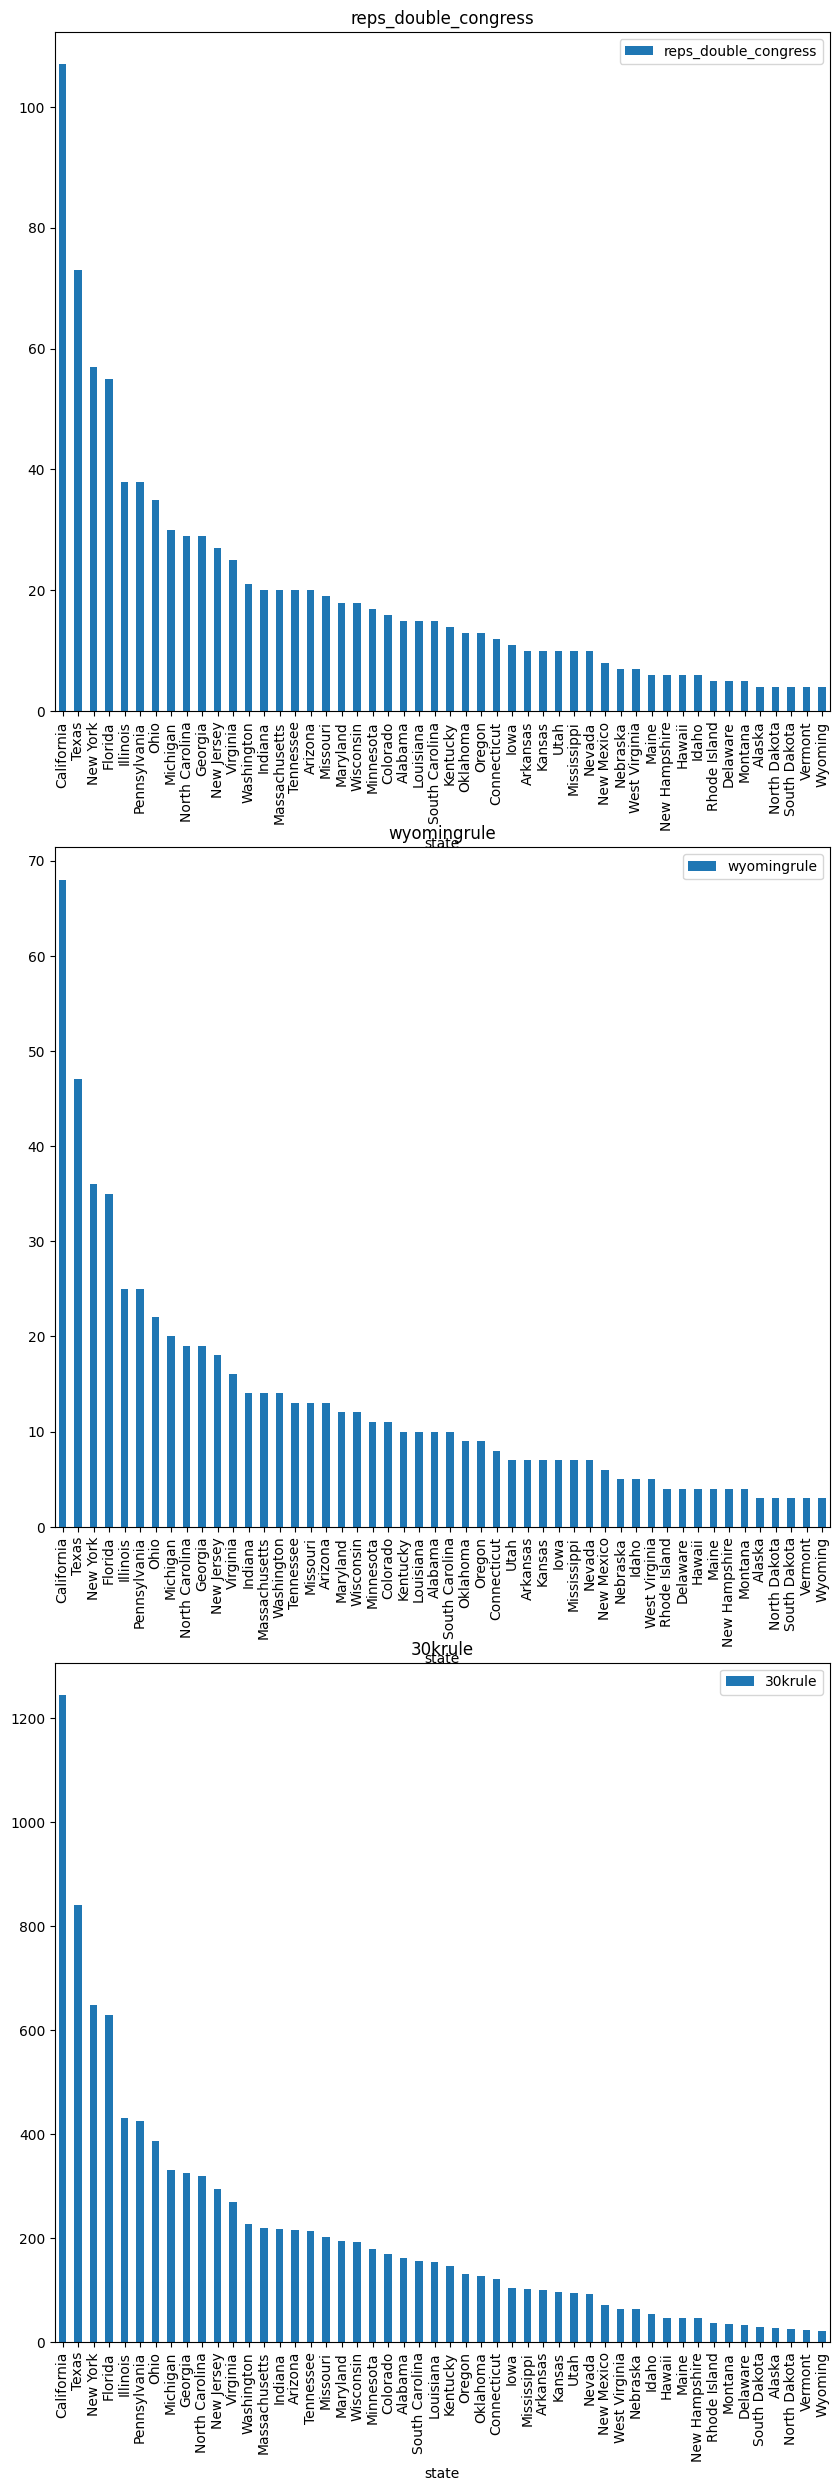

In [28]:
import matplotlib.pyplot as plt

# 3 separate plots for each rule
# Make them big
fig, axs = plt.subplots(3, 1, figsize=(10, 30))
for i, rule in enumerate(['reps_double_congress', 'wyomingrule', '30krule']):
    c10.sort_values(rule, ascending=False).plot.bar(x='state', y=rule, ax=axs[i], title=rule)
plt.show()


In [29]:
elections = pd.read_csv('./data/elections.csv')
elections.head()

,state,2016,2020,2024
0,Alabama,R,R,R
1,Alaska,R,R,R
2,Arizona,R,D,T
3,Arkansas,R,R,R
4,California,D,D,D


In [33]:
# Actual percentage popular vote: 46.1% Republican, 48.2% Democratic
# Actual electoral votes: 304 Republican, 227 Democratic
print("Actual percentage popular vote: 46.1% Republican, 48.2% Democratic")
print("Actual electoral votes: 304 Republican, 227 Democratic")
print("Actual electoral vote percentage: 56.5% Republican, 42.1% Democratic")
print("Actual electoral vote percentage: ")
columns_to_adjust = ['reps_double_congress', 'wyomingrule', '30krule']
for col in columns_to_adjust:
    c10[f'{col}_total'] = c10[col] + 2

# Step 2: Merge the dataframes
merged_df = pd.merge(c10, elections[['state', '2016']], on='state', how='left')

# Step 3: Calculate electoral votes for each scenario
scenarios = ['reps_double_congress_total', 'wyomingrule_total', '30krule_total']

results = {}
for scenario in scenarios:
    # Calculate Republican electoral votes
    rep_votes = merged_df[merged_df['2016'] == 'R'][scenario].sum()
    
    # Calculate Democratic electoral votes
    dem_votes = merged_df[merged_df['2016'] == 'D'][scenario].sum()
    
    # Store results
    results[scenario] = {'Republican': rep_votes, 'Democratic': dem_votes}

# Print results
for scenario, votes in results.items():
    print(f"\nScenario: {scenario}")
    print(f"Republican: {votes['Republican']}")
    print(f"Democratic: {votes['Democratic']}")
    total = votes['Republican'] + votes['Democratic']
    print(f"Total Electoral Votes: {total}")
    print(f"Republican Percentage: {votes['Republican'] / total * 100:.2f}%")
    print(f"Democratic Percentage: {votes['Democratic'] / total * 100:.2f}%")
    # Percentage of total electoral votes
    rep_percent = votes['Republican'] / (votes['Republican'] + votes['Democratic']) * 100
    winner = 'Republican' if votes['Republican'] > votes['Democratic'] else 'Democratic'
    print(f"Winner: {winner}")


Actual percentage popular vote: 46.1% Republican, 48.2% Democratic
Actual electoral votes: 304 Republican, 227 Democratic
Actual electoral vote percentage: 56.5% Republican, 42.1% Democratic
Actual electoral vote percentage: 

Scenario: reps_double_congress_total
Republican: 610.0
Democratic: 461.0
Total Electoral Votes: 1071.0
Republican Percentage: 56.96%
Democratic Percentage: 43.04%
Winner: Republican

Scenario: wyomingrule_total
Republican: 427.0
Democratic: 318.0
Total Electoral Votes: 745.0
Republican Percentage: 57.32%
Democratic Percentage: 42.68%
Winner: Republican

Scenario: 30krule_total
Republican: 5913.0
Democratic: 4560.0
Total Electoral Votes: 10473.0
Republican Percentage: 56.46%
Democratic Percentage: 43.54%
Winner: Republican


In [36]:
import pandas as pd
import numpy as np

# Assuming c10 and elections dataframes are already loaded

# Step 1: Data Verification
print("Step 1: Data Verification")
print("c10 DataFrame:")
print(c10.head())
print("\nElections DataFrame:")
print(elections.head())

# Step 2: Check total electors for each scenario
print("\nStep 2: Total Electors per Scenario")
for col in ['reps_double_congress', 'wyomingrule', '30krule']:
    total = c10[col].sum() + 100  # Adding 100 for the senators (2 per state)
    print(f"{col}: {total}")

# Step 3: Calculate and print electoral votes for top 5 and bottom 5 states
print("\nStep 3: Electoral Votes for Top 5 and Bottom 5 States")
for col in ['reps_double_congress', 'wyomingrule', '30krule']:
    print(f"\nScenario: {col}")
    c10_sorted = c10.sort_values(col, ascending=False)
    for i in range(5):
        print(f"Top {i+1}: {c10_sorted.iloc[i]['state']} - {c10_sorted.iloc[i][col] + 2}")
    for i in range(1, 6):
        print(f"Bottom {i}: {c10_sorted.iloc[-i]['state']} - {c10_sorted.iloc[-i][col] + 2}")

# Step 4: Recalculate electoral college results
print("\nStep 4: Recalculated Electoral College Results")
merged_df = pd.merge(c10, elections[['state', '2016']], on='state', how='left')

scenarios = ['reps_double_congress', 'wyomingrule', '30krule']

results = {}
for scenario in scenarios:
    rep_votes = merged_df[merged_df['2016'] == 'R'][scenario].sum() + 2 * sum(merged_df['2016'] == 'R')
    dem_votes = merged_df[merged_df['2016'] == 'D'][scenario].sum() + 2 * sum(merged_df['2016'] == 'D')
    total_votes = rep_votes + dem_votes
    
    print(f"\nScenario: {scenario}")
    print(f"Republican: {rep_votes} ({rep_votes/total_votes*100:.2f}%)")
    print(f"Democratic: {dem_votes} ({dem_votes/total_votes*100:.2f}%)")
    print(f"Total Electoral Votes: {total_votes}")
    winner = 'Republican' if rep_votes > dem_votes else 'Democratic'
    print(f"Winner: {winner}")

    results[scenario] = {'Republican': rep_votes, 'Democratic': dem_votes}

# Step 5: Compare to actual 2016 result
actual_2016 = {'Republican': 304, 'Democratic': 227}
print("\nStep 5: Comparison to Actual 2016 Result")
for scenario, votes in results.items():
    rep_diff = votes['Republican'] - actual_2016['Republican']
    dem_diff = votes['Democratic'] - actual_2016['Democratic']
    print(f"\n{scenario}:")
    print(f"Republican difference: {rep_diff}")
    print(f"Democratic difference: {dem_diff}")

Step 1: Data Verification
c10 DataFrame:
        state   pop2010  reps_double_congress  wyomingrule  30krule  \
5     Alabama   4779736                  15.0         10.0    161.0   
6      Alaska    710231                   4.0          3.0     26.0   
7     Arizona   6392017                  20.0         13.0    215.0   
8    Arkansas   2915918                  10.0          7.0     99.0   
9  California  37253956                 107.0         68.0   1244.0   

   reps_double_congress_total  wyomingrule_total  30krule_total  
5                        17.0               12.0          163.0  
6                         6.0                5.0           28.0  
7                        22.0               15.0          217.0  
8                        12.0                9.0          101.0  
9                       109.0               70.0         1246.0  

Elections DataFrame:
        state 2016 2020 2024
0     Alabama    R    R    R
1      Alaska    R    R    R
2     Arizona    R    D    